In [1]:
### this is just a misc. code for data observation and some web scraping
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#from __future__ import division, print_function
import requests
import bs4 as bs
from collections import Counter

In [2]:
### getting hourly weather using weather underground api
import re
import csv
from io import StringIO
urlLinks = []
for i in range (1,32,1):
    link = 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KCASOUTH124&graphspan=day&month=1&day=' +str(i)+'&year=2019&format=1&_ga=2.59272430.252223254.1554579164-2142721326.1554579164'
    urlLinks.append(link) 
print(urlLinks)

for l in urlLinks:
    source = requests.get(l)
    soup = bs.BeautifulSoup(source.content, features='html.parser')
    text =soup.text
    
    s = StringIO(text)
    print(s)
    with open('2019JanWeather.csv', 'w') as f:
        for line in s:
            f.write(line)

['https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KCASOUTH124&graphspan=day&month=1&day=1&year=2019&format=1&_ga=2.59272430.252223254.1554579164-2142721326.1554579164', 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KCASOUTH124&graphspan=day&month=1&day=2&year=2019&format=1&_ga=2.59272430.252223254.1554579164-2142721326.1554579164', 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KCASOUTH124&graphspan=day&month=1&day=3&year=2019&format=1&_ga=2.59272430.252223254.1554579164-2142721326.1554579164', 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KCASOUTH124&graphspan=day&month=1&day=4&year=2019&format=1&_ga=2.59272430.252223254.1554579164-2142721326.1554579164', 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KCASOUTH124&graphspan=day&month=1&day=5&year=2019&format=1&_ga=2.59272430.252223254.1554579164-2142721326.1554579164', 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KC

In [3]:
###some data exploration using bike trip data 2019-01, just some graph of analysis
### most of the queries has been processed through bigquery, result has been exported to local
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('weekday_count.csv')


<BarContainer object of 7 artists>

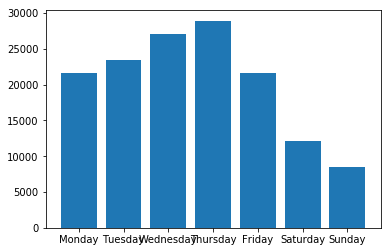

In [12]:
val = df['count']
index = df['weekday']
plt.bar(index,val,align='center')


In [14]:
## data exploration on the windSpeed
df2 = pd.read_csv('windSpeed.csv')

<BarContainer object of 29 artists>

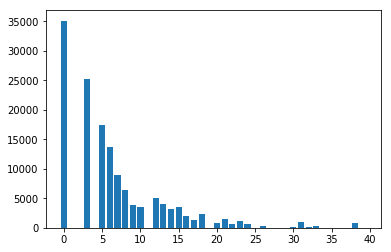

In [15]:
val = df2['count']
index = df2['wind']
plt.bar(index,val,align='center')

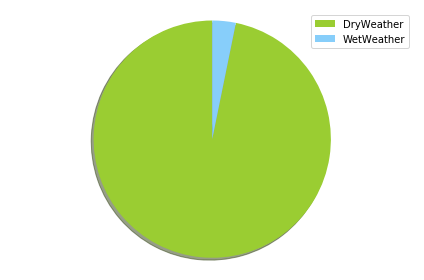

In [16]:
##pie chart on weather data is wet/dry
##very simple result, no need to import. dryday: 138514 wetday: 4577
labels = ['DryWeather', 'WetWeather']
sizes = [138514,4577]
colors = ['yellowgreen', 'lightskyblue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()